In [3]:
from scipy.io import loadmat
from scipy.stats import kurtosis
from scipy.stats import entropy
##import pyrem as pr

In [42]:
##data = loadmat('data.mat')
patient_1_14 = loadmat('patient_1_14.mat')
patient_1_103 = loadmat('patient_1_103.mat')
patient_1_112 = loadmat('patient_1_112.mat')
patient_1_147 = loadmat('patient_1_147.mat')
patient_1_161 = loadmat('patient_1_161.mat')

sf = len(patient_1_14['data'][:,0])

In [7]:
##print (data['data']).shape
print (patient_1_14['data'])
print (patient_1_103['data'])
print (patient_1_112['data'])
print (patient_1_147['data'])
print (patient_1_161['data'])

[[  5512 -20343   5887 ...  11434  13483  10178]
 [  5504 -20344   5879 ...  11432  13480  10176]
 [  5509 -20347   5883 ...  11430  13478  10174]
 ...
 [  5694 -20425   6068 ...  11560  13554  10246]
 [  5671 -20424   6046 ...  11561  13553  10245]
 [  5641 -20422   6018 ...  11564  13554  10244]]
[[  3925 -19890   4294 ...  10864  11320   8122]
 [  3926 -19888   4296 ...  10865  11322   8123]
 [  3926 -19887   4296 ...  10866  11323   8123]
 ...
 [  3913 -19962   4277 ...  10203  11131   7893]
 [  3925 -19964   4288 ...  10204  11131   7892]
 [  3941 -19966   4303 ...  10205  11131   7892]]
[[  3084 -20623   3453 ...   9227  10483   6281]
 [  3074 -20622   3441 ...   9228  10484   6280]
 [  3075 -20622   3440 ...   9228  10484   6279]
 ...
 [  3158 -20659   3527 ...   9978  10870   6531]
 [  3169 -20662   3536 ...   9975  10867   6529]
 [  3177 -20663   3544 ...   9975  10866   6528]]
[[  2262 -19012   2635 ...  10389  10151   7480]
 [  2209 -19010   2579 ...  10388  10151   7480]
 [

In [4]:
print data['data'][0].size

47


In [10]:
import matplotlib.pyplot as plt

In [9]:
%matplotlib inline
import numpy as np

### First visualisation of all data

In [23]:
time_14 = np.arange(0, 5000)
##plt.plot(time_14, patient_1_14['data'])
##plt.show()
fig = plt.figure(figsize=(20,200))
for c in range(1,48):
    channel = patient_1_14['data'][:,c-1]
    plt.subplot(25,2,c)
    plt.plot(time_14, channel)
    plt.title("Channel: " + str(c))

### Visualization of raw signal data collected in each channel

In [8]:
fig = plt.figure(figsize=(20,200))
for c in range(1,48):
    channel = data['data'][:,c-1]
    plt.subplot(25,2,c)
    plt.plot(time, channel)
    plt.title("Channel: " + str(c))

### We observe that channels 14, 19, 20 show clearest anomalies in the data.

In [24]:
best_channels = [14,19,20]

## Helper functions to extract and plot features

In [61]:
### LINE LENGTH
def linelength(second):
    ll = 0
    for i in range(second.size):
        ll += abs(second[i] - second[i-1])
    return ll

### ENERGY
def energy(second):
    energy = 0
    for i in range(second.size):
        energy += second[i]**2
    energy = energy / (second.size)
    return energy

### VARIANCE
def variance(second):
    return second.var()

### SPECTRAL POWER
def extract_band_low(second):
    fourier = np.fft.fft(second)
    fourier_psd = np.abs(fourier) ** 2
    return np.sum(fourier_psd[12:31]) * 2 / sf

### SPECTRAL POWER
def extract_band_high(second):
    fourier = np.fft.fft(second)
    fourier_psd = np.abs(fourier) ** 2
    return np.sum(fourier_psd[100:601]) * 2 / sf

### POWER RATIO
def extract_band_high_to_low_ratio(second):
    return extract_band_high(second) / extract_band_low(second)

### KURTOSIS
def extract_kurtosis(second):
    return kurtosis(second)

### HJORTH ACTIVITY
def hjorth_activity(second):
    activity, complexity, morbidity = pr.univariate.hjorth(second)
    return activity

### HJORTH COMPLEXITY
def hjorth_complexity(second):
    activity, complexity, morbidity = pr.univariate.hjorth(second)
    return complexity

### HJORTH MORBIDITY
def hjorth_morbidity(second):
    activity, complexity, morbidity = pr.univariate.hjorth(second)
    return morbidity

### SPECTRAL ENTROPY
def spectral_entropy(second):
    return pyrem.univariate.spectral_entropy(second, sf)

### MAX VOLTAGE
def max_voltage(second):
    return max(second)

### MIN VOLTAGE
def min_voltage(second):
    return min(second)
    

In [62]:
def features(channel, frequency, function):
    i = 0
    features = []
    while (i < channel.size):
        if (i < channel.size - (channel.size % frequency)):
            # One second of samples
            second = channel[i:i+frequency]
        else:
            second = channel[i:]
        features.append(function(second))
        i = i + frequency
    return features

In [63]:
def plot_features(c, sampling_freq):
    """Takes as input c, the channel number. Plots all 5 features."""
    channel = patient_1_14['data'][:,c-1]
    
    plt.figure(figsize=(20,3))
    plt.plot(channel)
    plt.title("Raw Data for Channel: " + str(c))
    
    plt.figure(figsize=(20,3))
    plt.plot(features(channel, sampling_freq, linelength))
    plt.title("Linelength of Channel: " + str(c))

    plt.figure(figsize=(20,3))
    plt.plot(features(channel, sampling_freq, energy))
    plt.title("Energy of Channel: " + str(c))

    plt.figure(figsize=(20,3))
    plt.plot(features(channel, sampling_freq, variance))
    plt.title("Variance of Channel: " + str(c))

    plt.figure(figsize=(20,3))
    plt.plot(features(channel, sampling_freq, extract_band_low))
    plt.title("Beta Spectral Power of Channel: " + str(c))

    plt.figure(figsize=(20,3))
    plt.plot(features(channel, sampling_freq, extract_band_high_to_low_ratio))
    plt.title("High to Low Power Ratio: " + str(c))
    
    plt.figure(figsize=(20,3))
    plt.plot(features(channel, sampling_freq, extract_kurtosis))
    plt.title("Kurtosis of Channel: " + str(c))
    
    plt.figure(figsize=(20,3))
    plt.plot(features(channel, sampling_freq, hjorth_activity))
    plt.title("Hjorth Activity of Channel: " + str(c))
    
    plt.figure(figsize=(20,3))
    plt.plot(features(channel, sampling_freq, hjorth_complexity))
    plt.title("Hjorth Complexity of Channel: " + str(c))
    
    plt.figure(figsize=(20,3))
    plt.plot(features(channel, sampling_freq, hjorth_morbidity))
    plt.title("Hjorth Morbidity of Channel: " + str(c))
    
    plt.figure(figsize=(20,3))
    plt.plot(features(channel, sampling_freq, spectral_entropy))
    plt.title("Spectral Entropy of Channel: " + str(c))
    
    plt.figure(figsize=(20,3))
    plt.plot(features(channel, sampling_freq, max_voltage))
    plt.title("Max Voltage of Channel: " + str(c))
    
    plt.figure(figsize=(20,3))
    plt.plot(features(channel, sampling_freq, min_voltage))
    plt.title("Min Voltage of Channel: " + str(c))
    
    return
    

## Final plots of features for each of the chosen channels

#### Channel 14

D:\jstor\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in long_scalars
  if sys.path[0] == '':


NameError: name 'pr' is not defined

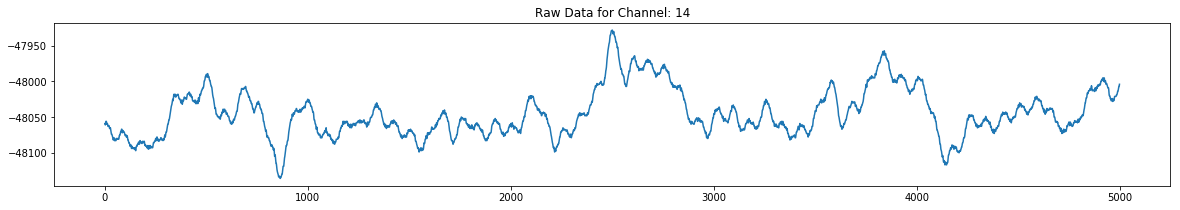

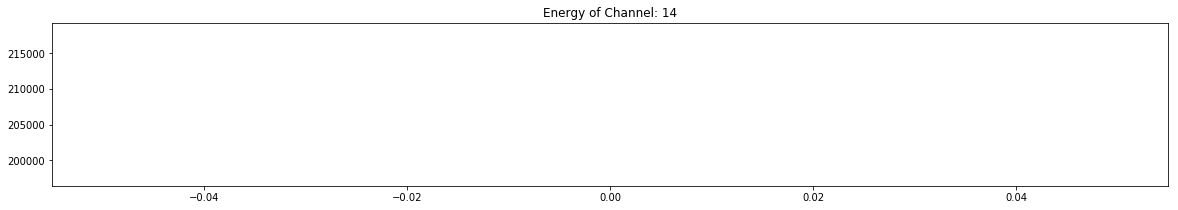

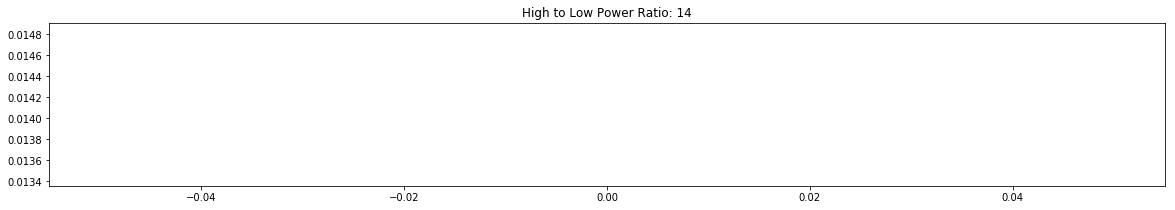

<Figure size 1440x216 with 0 Axes>

In [64]:
c=14

plot_features(c, 5000)

#### Channel 19

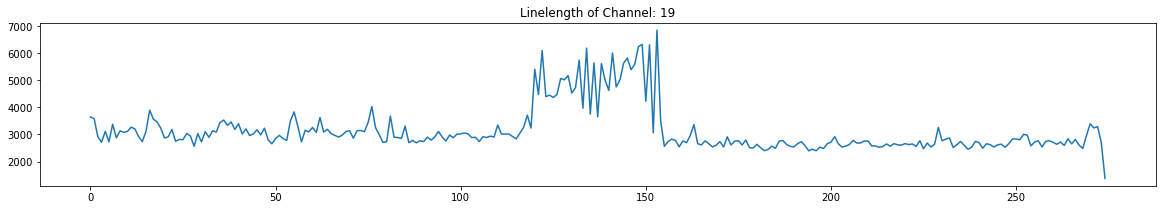

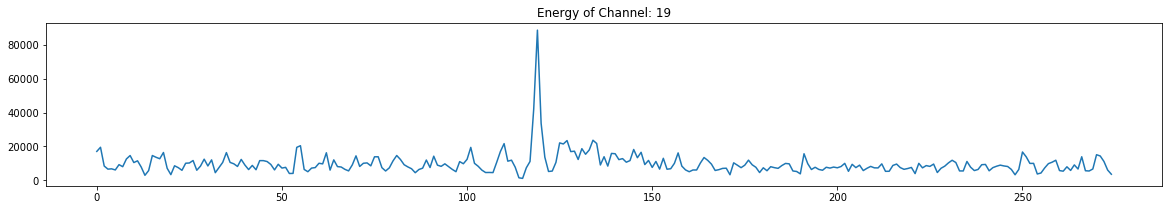

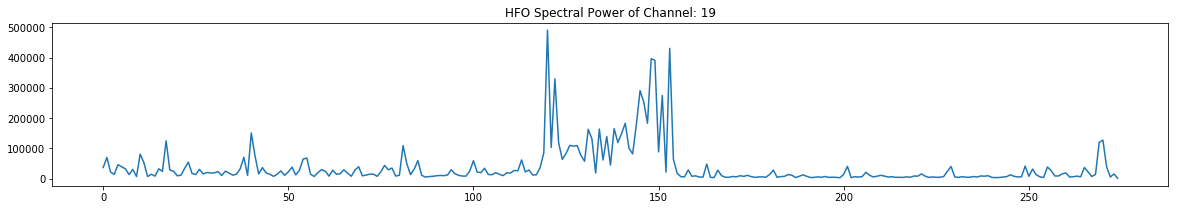

In [14]:
c=19

plot_features(c)

#### Channel 20

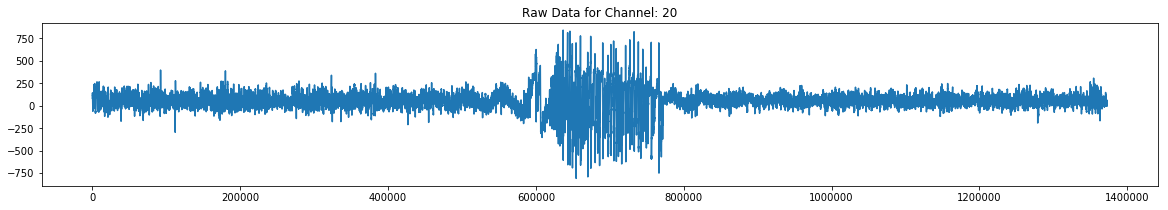

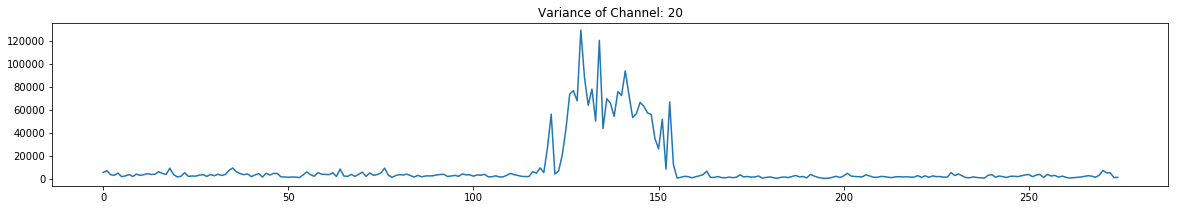

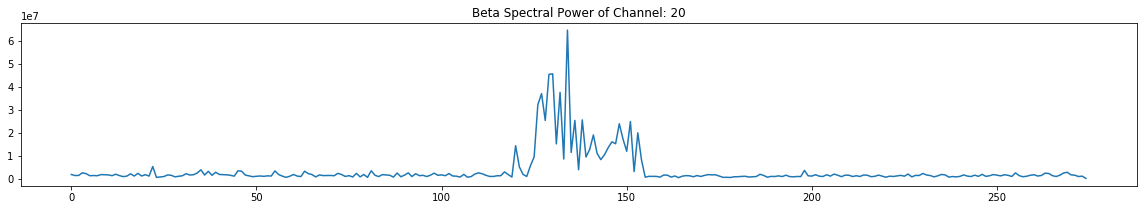

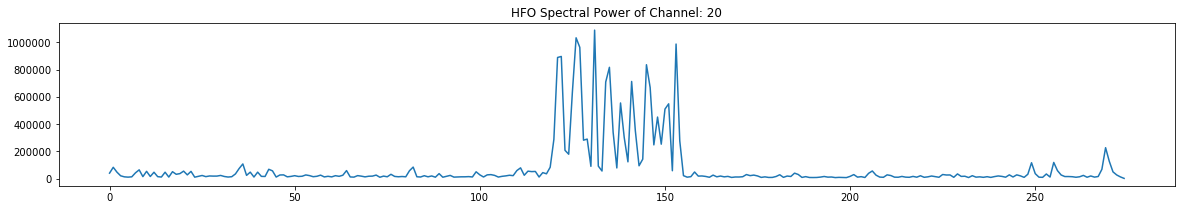

In [15]:
c=20

plot_features(c)

#### We can see that in each of these 3 channels, all 5 extracted features show an anomaly in the data during the seizure duration.